# Inspect ScaleVarianceTask on HSC calexps
We plot the ScaleVariance correction factors for some calexps and deepCoadd_directWarp that go into the HSC templates.
We query the deepCoadd_directWarp data id-s to identify the input calexps.

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
from astropy.visualization import ZScaleInterval
from lsst.pipe.tasks.scaleVariance import ScaleVarianceTask, ScaleVarianceConfig
import numpy as np
from astropy.table import Table
plt.rcParams['figure.figsize'] = (8.5, 5)

In [30]:
butler=Butler('/datasets/hsc/gen3repo/rc2w50_ssw02', collections='HSC/runs/RC2/w_2020_50',
              writeable=False)

In [31]:
qDataIds = butler.registry.queryDataIds(["visit"], where="band='g'", datasets="deepCoadd_directWarp")

In [32]:
templateVisits = { x["visit"] for x in qDataIds }

In [33]:
# Use one of them
visitId = next(iter(templateVisits))
print(visitId)

29324


In [34]:
# deepCoadd_directWarp: all tract-patch that overlap with (any detectors of) the visit
dataRefs = set(butler.registry.queryDatasets("deepCoadd_directWarp", dataId={'band':'g', 'visit': visitId}))

In [35]:
scaleConfig = ScaleVarianceConfig()
scaleTask = ScaleVarianceTask(config=scaleConfig)
R = []
for cref in dataRefs:
    singleP = butler.get(cref)
    try:
        # There are some patches with all NaN where this task fails with runtime error
        scaleFactor = scaleTask.calculateBothFactors(singleP.getMaskedImage())
        x = [ cref.dataId['tract'], cref.dataId['patch'], scaleFactor.pixFactor, scaleFactor.imageFactor]
        R.append(x)
        print(x)
    except:
        print("Failed: ",cref.dataId['tract'], cref.dataId['patch'])
        pass

[9813, 58, 1.1335301300632683, 1.1322709922228535]
[9813, 76, 1.1089023399830416, 1.107253080536886]
[9813, 14, 1.1203736528983796, 1.1179621586036819]
[9813, 49, 1.1415326219393056, 1.1417098233242358]
[9813, 59, 1.1322064786816903, 1.1363023029327008]
[9813, 52, 1.119705338969583, 1.119427437942082]
[9813, 30, 1.1352653092351044, 1.135966455172982]
[9813, 40, 1.142443126742703, 1.143371309197399]
[9813, 36, 1.1135281980377423, 1.1141825388892908]
[9813, 51, 1.13270946430583, 1.1320899067791428]
[9813, 15, 1.1189973781194944, 1.118271062405866]
[9813, 19, 1.1120818054815673, 1.1109521660858264]
[9813, 53, 1.1143967827636192, 1.1130699333544576]
[9813, 71, 1.0981910658505627, 1.1001421213896845]
[9813, 62, 1.1056684308044438, 1.1062253584726816]
[9813, 57, 1.1262010827028794, 1.1240636645770776]
[9813, 20, 1.1211084820988266, 1.1183023289849492]
[9813, 43, 1.1253783489290194, 1.1245593300496735]
[9813, 55, 1.10536220942911, 1.1062504482522837]
[9813, 48, 1.142045098587235, 1.1390042519

/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[9813, 77, 1.1057467668456813, 1.1039075467986479]
[9813, 46, 1.1163952115408713, 1.1123547449739941]
[9813, 29, 1.1236663611673443, 1.1215075021256868]
[9813, 38, 1.1257147770141536, 1.1249333865535756]
[9813, 79, 1.0974330598839852, 1.1003889906719977]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[9813, 61, 1.1170893423561967, 1.11767453693934]
[9813, 16, 1.1259153381817626, 1.1278904734447461]
[9813, 32, 1.1361570916122206, 1.1361416615012845]
[9813, 74, 1.1016329688146358, 1.1052804614980403]
[9813, 35, 1.1106869274164957, 1.1132129012938687]
[9813, 50, 1.1392880313096376, 1.1386571008235533]
[9813, 69, 1.113421522056836, 1.111307845955817]
[9813, 13, 1.1253183638356175, 1.1231422385697725]
[9813, 11, 1.1084933646580433, 1.1068453538514924]
[9813, 56, 1.1213292767568641, 1.1203406227239479]
[9813, 78, 1.1078834089677805, 1.1072528169070233]
[9813, 80, 1.1059667162589597, 1.105350755115501]
[9813, 75, 1.12133908516771, 1.1212648850117028]
[9813, 37, 1.1193368176653768, 1.116946357987051]
[9813, 27, 1.123087208224201, 1.1227753112054915]
[9813, 60, 1.1295087589104469, 1.1279916319413148]
[9813, 64, 1.099480234948082, 1.099470729786532]
[9813, 33, 1.1310496040940778, 1.12857127929098]
[9813, 31, 1.137948435082629, 1.1377672193528632]
[9813, 54, 1.1117059373823173, 1.111999242119

/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[9813, 25, 1.1144787334132282, 1.1151057786093146]
[9813, 28, 1.1132263349974463, 1.114743719504858]
[9813, 39, 1.1467011757198644, 1.1479549287957453]
[9813, 24, 1.1244257247714378, 1.124968813867139]
[9813, 68, 1.1150014725099715, 1.113565707196348]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[9813, 44, 1.1107461029036811, 1.1110039097758422]


In [36]:
T = Table(names=['tract', 'patch', 'pixFactor', 'imgFactor'], rows=R)

<IPython.core.display.Javascript object>


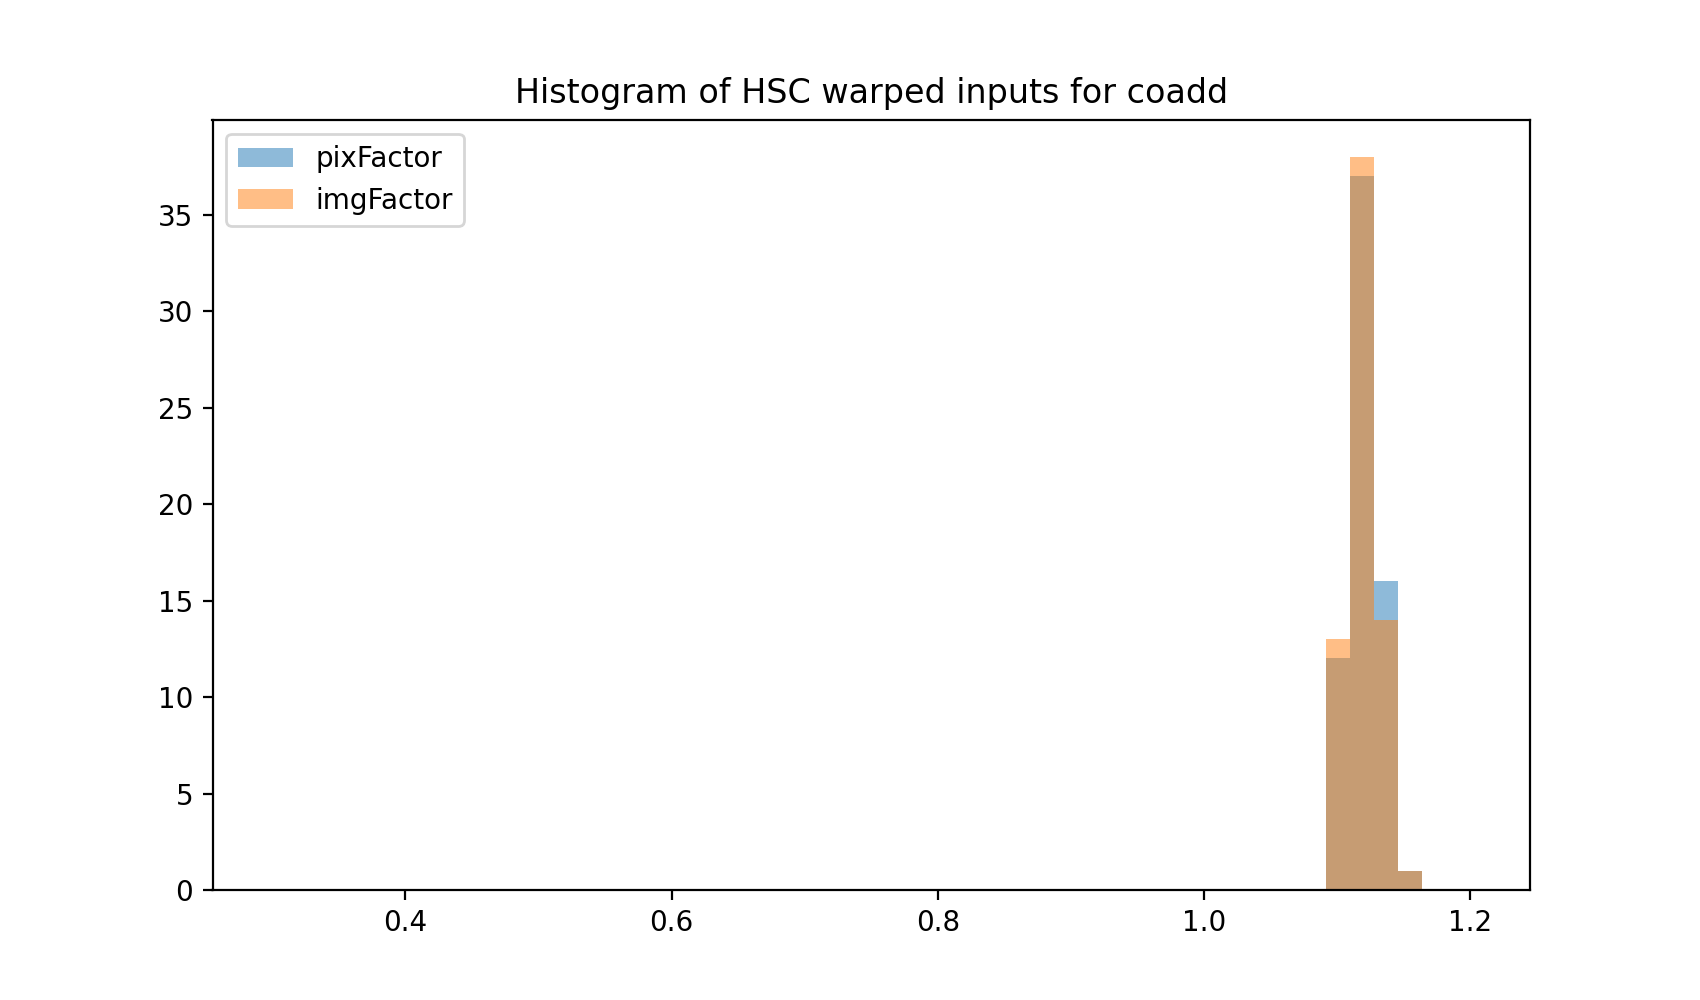

In [38]:
fig, ax = plt.subplots()
ax.hist(T['pixFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='pixFactor')
ax.hist(T['imgFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='imgFactor')
ax.set_title("Histogram of HSC warped inputs for coadd")
ax.legend()

----------

Now see the individual calexps without being warped to the skymap grid

In [40]:
calexpRefs = set(butler.registry.queryDatasets("calexp", dataId={'band':'g', 'visit': visitId}))

In [41]:
scaleConfig = ScaleVarianceConfig()
scaleTask = ScaleVarianceTask(config=scaleConfig)
R = []
for cref in calexpRefs:
    singleP = butler.get(cref)
    try:
        # There are some patches with all NaN where this task fails with runtime error
        scaleFactor = scaleTask.calculateBothFactors(singleP.getMaskedImage())
        x = [ cref.dataId['visit'], cref.dataId['detector'], scaleFactor.pixFactor, scaleFactor.imageFactor]
        R.append(x)
        print(x)
    except:
        print("Failed: ",cref.dataId['visit'], cref.dataId['detector'])
        pass

[29324, 52, 1.1117577221539234, 1.1146075319077176]
[29324, 42, 1.1395781750273286, 1.140998487645372]
[29324, 15, 1.1071971571022685, 1.118321727058619]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 70, 1.096026183818856, 1.1110491003233902]
[29324, 28, 1.1141797677868757, 1.1164684323476168]
[29324, 98, 1.1035896214596905, 1.1032305828225453]
[29324, 14, 1.1196598101325321, 1.1219436878621154]
[29324, 13, 1.1294938053066033, 1.1298080045640315]
[29324, 32, 1.132904450558113, 1.1352485923143771]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 77, 1.097443340801524, 1.120994924081411]
[29324, 25, 1.136401156534567, 1.136528452592778]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 101, 1.099053949861668, 1.1048499456509595]
[29324, 65, 1.1316744662733698, 1.1305872331095672]
[29324, 87, 1.1074007731037658, 1.108431255962355]
[29324, 67, 1.1281171854783725, 1.1324406760472026]
[29324, 0, 1.1180567168005184, 1.127856401019678]
[29324, 83, 1.1049221281742327, 1.1059255335509854]
[29324, 60, 1.1173471793521175, 1.121285339254666]
[29324, 64, 1.1213927285925385, 1.12260639918325]
[29324, 47, 1.1180668373585143, 1.1191792083672867]
[29324, 63, 1.1189394296017894, 1.1208976076000112]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 95, 1.089476146330788, 1.0968501651051226]
[29324, 72, 1.124290934617, 1.1247595031775477]
[29324, 62, 1.106550138048087, 1.121377252109944]
[29324, 31, 1.1210710507441795, 1.1241124148043071]
[29324, 1, 1.1216001447797912, 1.1215056540524564]
[29324, 39, 1.1245485021546155, 1.127397274936538]
[29324, 86, 1.1152594178051949, 1.1148981476129085]
[29324, 80, 1.119005426643405, 1.1193810409997664]
[29324, 33, 1.141369832697574, 1.1416857171394132]
[29324, 41, 1.14534426945674, 1.146139542485954]
[29324, 88, 1.1110132721916501, 1.1122776002759684]
[29324, 20, 1.124315394548091, 1.1272165604374593]
[29324, 6, 1.1244294898448983, 1.124163949660203]
[29324, 27, 1.1256766604786637, 1.1260681845601688]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 21, 1.1136968328405392, 1.1141746172039453]
[29324, 18, 1.1307283028736728, 1.1312283948537896]
[29324, 19, 1.130737870892945, 1.1314323972740359]
[29324, 56, 1.132450025054249, 1.13442628026]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 10, 1.1216727601586713, 1.123762270289782]
[29324, 17, 1.1268076083849452, 1.1285565235785797]
[29324, 35, 1.1301094224657984, 1.1330470990424957]
[29324, 75, 1.1173476922118804, 1.1186250661008874]
[29324, 34, 1.1378955733798746, 1.1378303289804617]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 103, 1.0852219809883044, 1.0901020086789701]
[29324, 97, 1.1072646866622704, 1.1083242395288602]
[29324, 43, 1.1285691711879513, 1.1312394561258707]
[29324, 89, 1.1089346673906026, 1.1246517155949998]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 100, 1.1007805956480297, 1.1014110738659062]
[29324, 68, 1.1188635435746546, 1.1194697451379585]
[29324, 55, 1.118145704658483, 1.1196997695973876]
[29324, 81, 1.1194713338626592, 1.119126978974559]
[29324, 57, 1.143056509147649, 1.144834908831862]
[29324, 59, 1.1318323628807911, 1.1349472783309613]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 102, 1.0931080107299824, 1.0955430503776142]
[29324, 3, 1.1160226223995793, 1.1258143201101032]
[29324, 38, 1.11457298038527, 1.1268311568287213]
[29324, 5, 1.1216528601812699, 1.1220349260976228]
[29324, 37, 1.104676738977732, 1.1238013504771285]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 76, 1.1080093655855323, 1.1098151512187318]
[29324, 50, 1.1401160920689453, 1.1457476558730584]
[29324, 96, 1.10558819605463, 1.1153717324577592]
[29324, 61, 1.1071055893801762, 1.1288028510340986]
[29324, 11, 1.123337952814368, 1.1253538270085066]
[29324, 82, 1.1138584977856587, 1.1156236058515832]
[29324, 53, 1.1070734278705412, 1.1272508609302954]
[29324, 8, 1.1205995112381189, 1.1214009352710523]
[29324, 46, 1.1094054189713898, 1.1207605995114518]
[29324, 79, 1.1191504683376294, 1.1195659278969177]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 93, 1.1066460443750665, 1.1072560543540824]
[29324, 7, 1.1210169480127956, 1.1216730554900003]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 90, 1.098525717084879, 1.1075943415941059]
[29324, 94, 1.106946689153284, 1.1050930576917113]
[29324, 99, 1.1056600361653552, 1.11947598477911]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 45, 1.1026500410818523, 1.1208097423091088]
[29324, 16, 1.1181321323821047, 1.1191985710987564]
[29324, 74, 1.1259971964201967, 1.1262800444798449]
[29324, 69, 1.1079634948198913, 1.131790191296338]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 29, 1.1022921866960447, 1.1223846759892502]
[29324, 91, 1.1092171574503984, 1.1104611937811089]
[29324, 73, 1.131230490961603, 1.1311543834565514]
[29324, 85, 1.1120736888687341, 1.1133392895722027]
[29324, 26, 1.1334918110033134, 1.1338474197042159]
[29324, 24, 1.1314356480569843, 1.1328279391029312]
[29324, 2, 1.117703808481319, 1.118417608269028]
[29324, 54, 1.1128835890240296, 1.124020729182108]
[29324, 66, 1.132647617712295, 1.1328350172148658]
[29324, 12, 1.127505530216708, 1.1269797574829237]
[29324, 49, 1.1405311891276944, 1.1420044694011127]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 4, 1.1029795805992257, 1.1081092107030088]
[29324, 84, 1.106501096118729, 1.1105184875129375]
[29324, 71, 1.1146180564327146, 1.1169614029752504]
[29324, 36, 1.1220273690458764, 1.1259773733265088]
[29324, 92, 1.107985617595912, 1.1085215028166229]
[29324, 30, 1.1156371672582306, 1.126037910531461]
[29324, 58, 1.1371187397522333, 1.1388926651293565]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[29324, 22, 1.1078354749077097, 1.1179315559649459]
[29324, 78, 1.109837168411101, 1.1128496825332292]
[29324, 23, 1.12178954762138, 1.1252966057125453]
[29324, 44, 1.1208653645770232, 1.1226683342335169]
[29324, 51, 1.1324217922334554, 1.1373641592858315]
[29324, 48, 1.1396804933376825, 1.1401275625170415]
[29324, 40, 1.1391685475658677, 1.1417906492573195]


In [42]:
T = Table(names=['visit', 'detector', 'pixFactor', 'imgFactor'], rows=R)

<IPython.core.display.Javascript object>


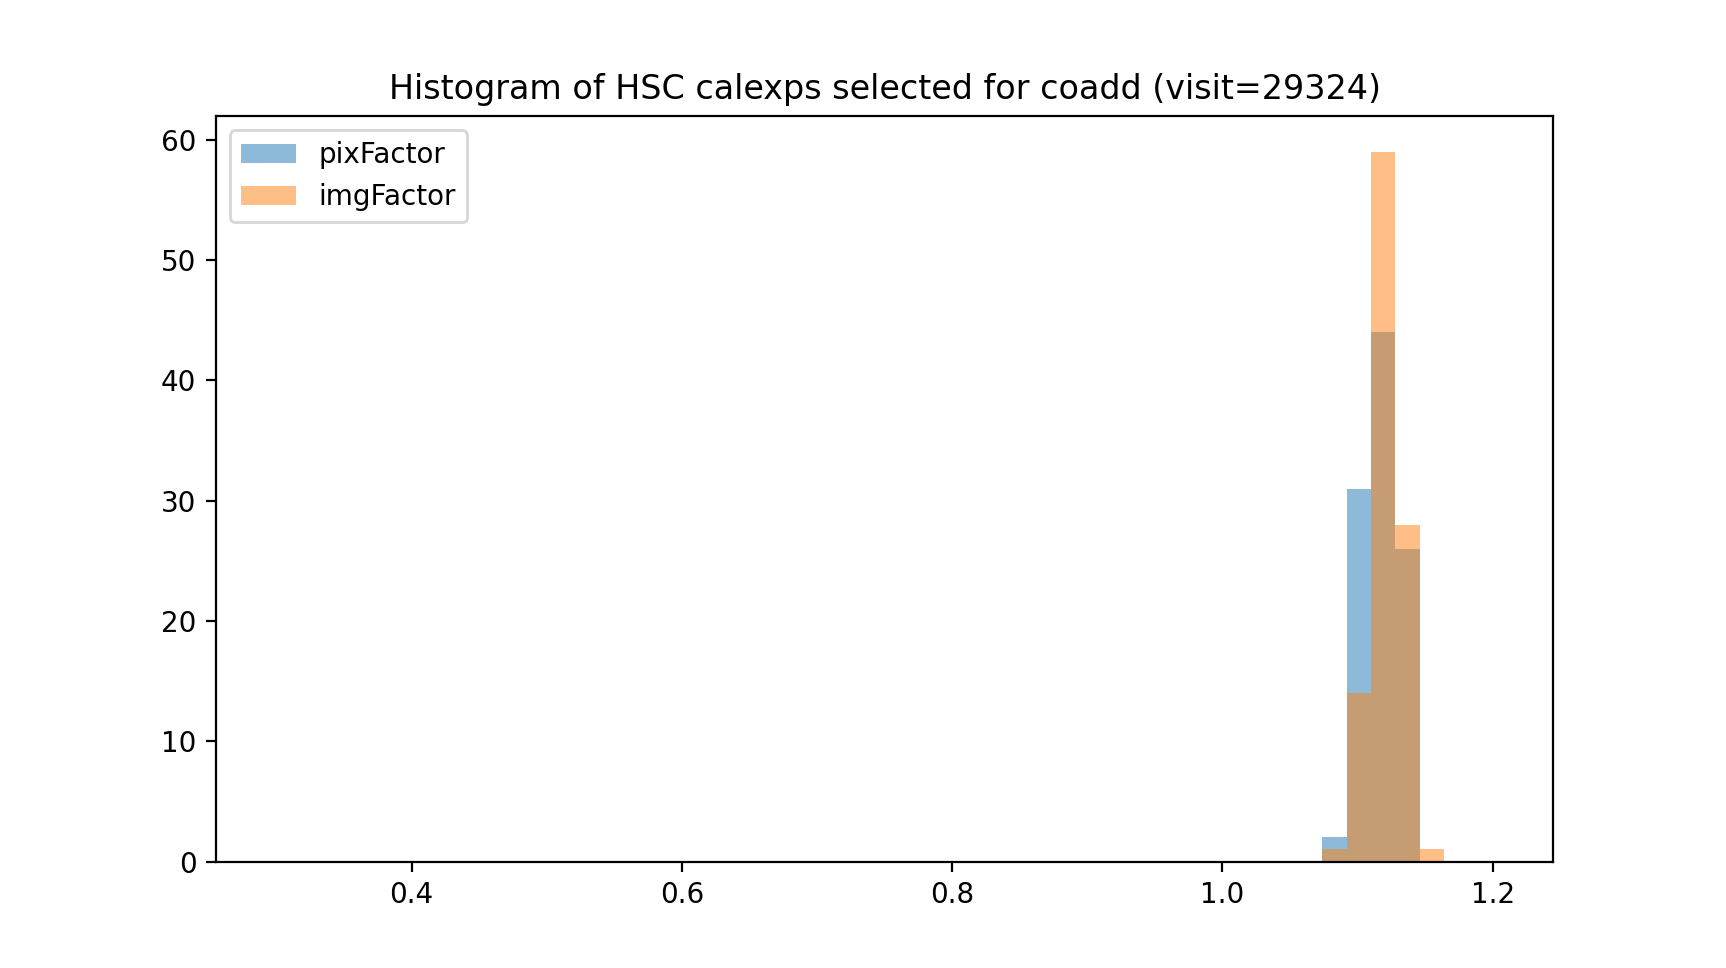

In [43]:
fig, ax = plt.subplots()
ax.hist(T['pixFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='pixFactor')
ax.hist(T['imgFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='imgFactor')
ax.set_title("Histogram of HSC calexps selected for coadd (visit={})".format(T['visit'][0]))
ax.legend()

------

(minimum=(0, 0), maximum=(2047, 4175))


<IPython.core.display.Javascript object>


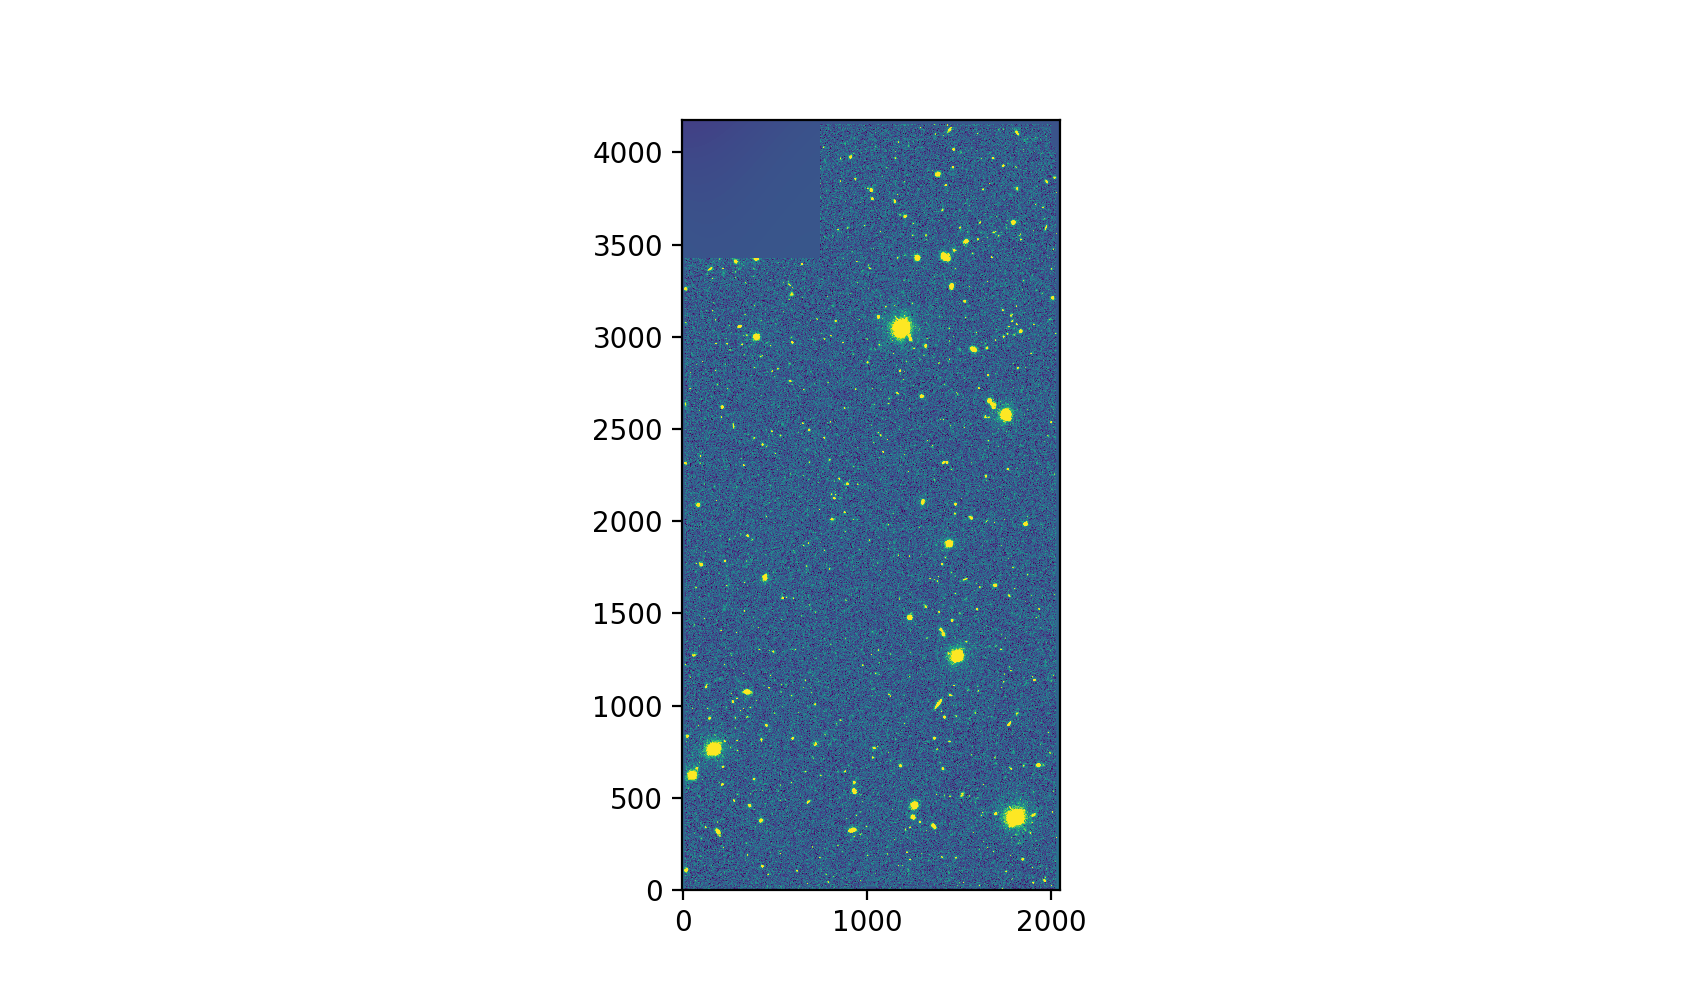

In [27]:
# Show the last image
zScaler = ZScaleInterval()
vmin, vmax = zScaler.get_limits(singleP.image.array)
bbox = singleP.getBBox()
print(bbox)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(singleP.image.array, origin='lower', interpolation='none', vmin=vmin, vmax=vmax, 
          extent=[bbox.getMinX()-0.5, bbox.getMaxX()+0.5, bbox.getMinY()-0.5, bbox.getMaxY()+0.5])